In [1]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib widget
import matplotlib 
import numpy as np
import pandas as pd
import os, sys, time
#import ipywidgets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection    
 
# use LaTeX, choose nice some looking fonts and tweak some settings
matplotlib.rc('font', family='serif')
matplotlib.rc('font', size=16)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('legend', handlelength=1.5)
matplotlib.rc('legend', frameon=True)
matplotlib.rc('xtick.major', pad=7)
matplotlib.rc('xtick.minor', pad=7)
matplotlib.rc('text', usetex=True)
# matplotlib.rc('text.latex', 
#               preamble=[r'\usepackage[T1]{fontenc}',
#                         r'\usepackage{amsmath}',
#                         r'\usepackage{txfonts}',
#                         r'\usepackage{textcomp}'])

matplotlib.rc('figure', figsize=(12, 9))

#plt.style.use(["default"])

In [2]:
psddatafolder = r"/home/jiyongso/mydocs/psddata/FILTERED"

# psd = pd.read_pickle(os.path.join(psddatafolder, "ch2data_2.pkl"))
# psd.columns=["TimeTag"]+list(np.arange(168))

# # # 앞으로 데이터 해석하는데 필요할 backgroun와  maximum value 를 column으로 채워 넣음.
# bgval = psd.loc[:, 5:35].apply(np.mean, axis=1)
# bgstd = psd.loc[:, 5:35].apply(np.std, axis=1)
# psd.insert(loc=1, column = "BgVal", value=bgval)
# psd.insert(loc=2, column = "BgStd", value=bgstd)
# psd.insert(loc=3, column = "MaxIndex", value=psd.loc[:, 0:100].apply(np.argmax, axis=1))
# psd.insert(loc=4, column = "MaxVal", value = psd.loc[:, 0:100].apply(np.max, axis=1))

# psd.sort_values("MaxVal", ascending=False, inplace=True)

# psd.to_pickle(os.path.join(psddatafolder, "ch2data_3.pkl"))

psd = pd.read_pickle(os.path.join(psddatafolder, "ch2data_3.pkl"))

In [137]:
psd_drop_index=[1028194, ]

In [3]:
psd.loc[:100, :]

,TimeTag,BgVal,BgStd,MaxIndex,MaxVal,0,1,2,3,4,...,158,159,160,161,162,163,164,165,166,167
1860390,1501647601236436,19.548387,3.046296,59,15787,24,19,19,21,20,...,75,69,68,65,64,76,68,61,66,60
570282,459835841633703,20.258065,2.564871,59,15783,20,23,18,22,17,...,73,77,80,71,69,63,59,65,63,65
2101019,1695422026746984,19.032258,3.207691,59,15775,21,20,20,20,20,...,67,66,62,60,60,67,80,80,76,72
923588,745813135262483,20.096774,2.656153,58,15774,20,21,23,20,21,...,76,72,68,67,65,62,56,65,57,57
834923,673815462908327,20.387097,2.858800,59,15769,19,18,21,20,23,...,62,70,66,69,75,68,73,68,69,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213576,1786028185932171,22.935484,2.804783,55,1253,22,23,20,25,20,...,45,49,54,52,49,56,57,53,49,59
2206117,1780015201514249,20.548387,2.380549,54,1253,26,19,24,20,22,...,23,20,28,25,20,18,26,26,28,23
523230,422006859314921,21.483871,2.960721,55,1253,21,22,17,25,24,...,17,21,25,27,21,24,23,18,17,26
1506345,1216217451698078,21.645161,1.893084,54,1253,23,18,25,19,20,...,21,19,24,24,21,21,20,16,23,18


Text(0.5, 0, 'Channel (2ns)')

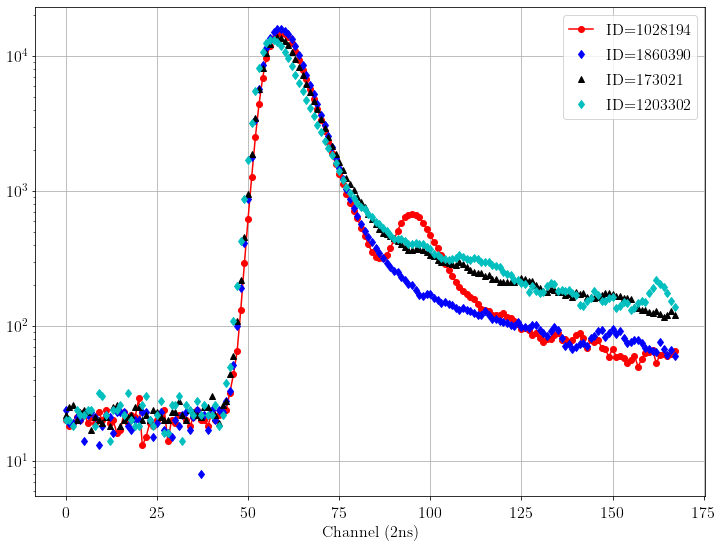

In [4]:
plt.plot(psd.loc[1028194, 0:], 'ro-', label="ID=1028194")
plt.plot(psd.loc[1860390, 0:], 'bd', label="ID=1860390")
plt.plot(psd.loc[173021, 0:], 'k^', label="ID=173021")
plt.plot(psd.loc[1203302, 0:]*2-24, 'cd', label="ID=1203302")
plt.yscale("log")
plt.legend()
plt.grid()
plt.xlabel("Channel (2ns)")
#plt.savefig("testfigure_1.jpg")

In [171]:
psd2=psd[psd["Maxval"]<12000]

In [5]:
#short=(psd2.loc[:][psd2["MaxIndex"]-16:psd2["MaxIndex"]+5]).sum()
def calc_ratio(pp):
    maxind = pp.MaxIndex
    short = (pp.loc[maxind-29:maxind+1]).sum()-pp.BgVal*30
    long = (pp.loc[maxind: maxind+101]).sum()-pp.BgVal*100
    return long/short

ppq=(psd.iloc[1020000:1040000]).apply(calc_ratio, axis=1)

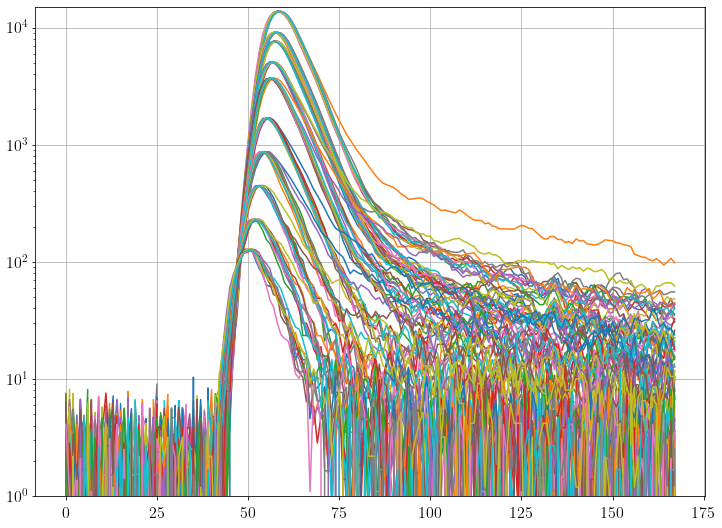

In [6]:
for i in range(521, 531):
    plt.plot(np.arange(168), psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

for i in range(5521, 5531):
    plt.plot(np.arange(168), psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

        
for i in range(11521, 11531):
    plt.plot(np.arange(168), psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

for i in range(51521, 51531):
    plt.plot(np.arange(168), psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

    
for i in range(101521, 101531):
    plt.plot(np.arange(168), psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

for i in range(301521, 301531):
    plt.plot(np.arange(168), psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])
    
for i in range(601521, 601531):
    plt.plot(np.arange(168), psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

for i in range(1001621, 1001631):
    plt.plot(np.arange(168), psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

for i in range(1501521, 1501531):
    plt.plot(np.arange(168), psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

for i in range(2001521, 2001531):
    plt.plot(np.arange(168), psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

#plt.plot(psd.iloc[-1000, 4:], lw=5, label="MAx")
plt.yscale("log")
plt.ylim([1, 15000])
#plt.legend()
plt.grid()
#plt.xlim([50, 70])

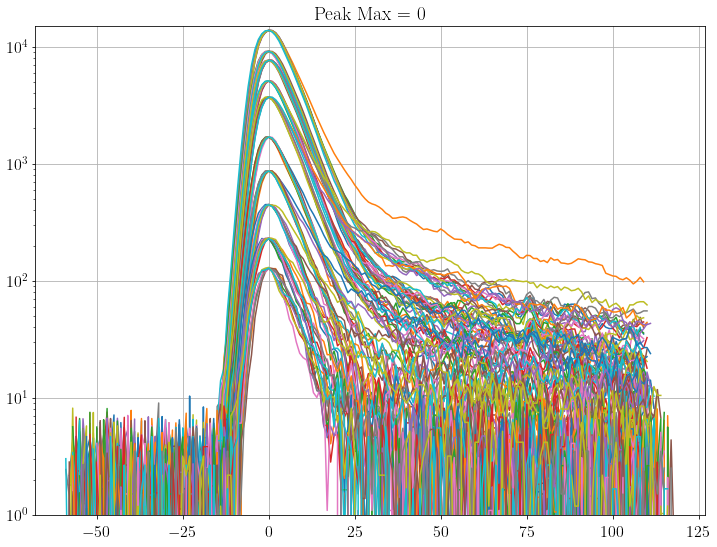

In [7]:
for i in range(521, 531):
    plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

for i in range(5521, 5531):
    plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

        
for i in range(11521, 11531):
    plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

for i in range(51521, 51531):
    plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

    
for i in range(101521, 101531):
    plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

for i in range(301521, 301531):
    plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])
for i in range(601521, 601531):
    plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

for i in range(1001621, 1001631):
    plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

for i in range(1501521, 1501531):
    plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

for i in range(2001521, 2001531):
    plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])
#plt.plot(psd.iloc[-1000, 4:], lw=5, label="MAx")
plt.yscale("log")
plt.ylim([1, 15000])
plt.title("Peak Max = 0")
#plt.legend()
plt.grid()

smooth step function Definition
====

$$
y=\dfrac{a}{1+\exp (-b(x-c))}+d
$$

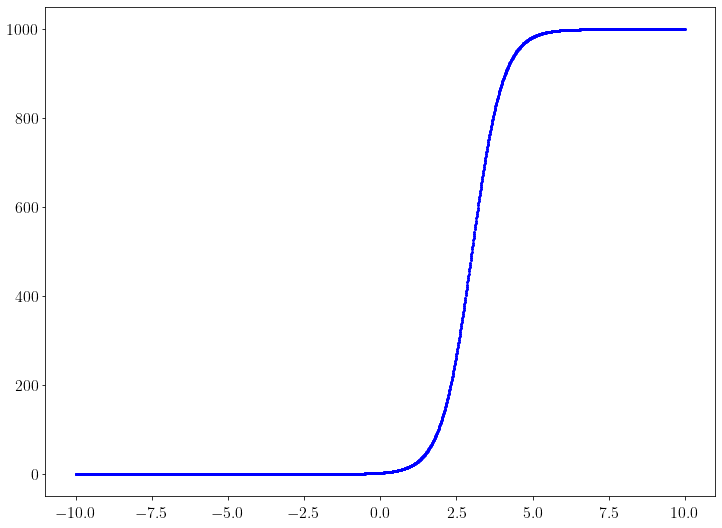

In [3]:
def smoothstep(x, a, b, c, d):
    return a/(1.0+np.exp(-b*((x-c))))+d

def residual(p, x, y):
    return y-smoothstep(x, p[0], p[1], p[2], p[3])

xx=np.arange(-10.0, 10.0, 0.01)
yy = smoothstep(xx, 1000., 2., 3.0, 0.2)
plt.plot(xx, yy, 'bo', ms=2)

In [9]:
psd.index
0.05*1.0e6

50000.0

Time for fitting :  0.0068280696868896484
Time for fitting :  0.0053255558013916016
Time for fitting :  0.009872198104858398


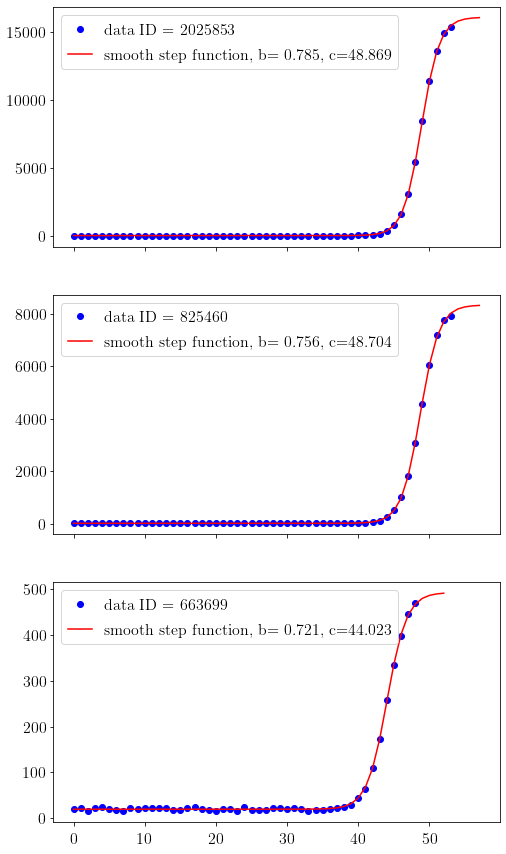

In [4]:
from scipy import optimize
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8,15))
p0 = [15000., 0.6, 53., 2.0]

for ind, peak in enumerate([100, 10000, 1000000]):
#     print(ind, peak)
    peakid = psd.index[peak]
    maxind = psd.loc[peakid]["MaxIndex"]
    yy = psd.loc[peakid, 5:int(maxind)]
    xx = np.arange(yy.shape[0])
    x2 = np.arange(yy.shape[0]+4)
    t1=time.time()
    popt, pcov = optimize.leastsq(residual, p0, args=(xx, yy))
    print("Time for fitting : ", time.time()-t1)
    maxind = psd.iloc[peak]["MaxIndex"]

    ax[ind].plot(xx, yy, 'bo', label="data ID = "+str(peakid))
    ax[ind].plot(x2, smoothstep(x2, popt[0], popt[1], popt[2], popt[3]), 
              'r-', label="smooth step function, b= %5.3f, c=%5.3f"%(popt[1], popt[2]))
    ax[ind].legend()
    #ax[ind].yscale('log')


In [5]:
t1=time.time()
result=[]
for ind, peak in enumerate(range(psd.shape[0])):
#     print(ind, peak)
    peakid = psd.index[peak]
    maxind = psd.iloc[ind]["MaxIndex"]
    p0 = [psd.iloc[ind]["MaxVal"], 0.6, maxind-5., 2.0]
    yy = psd.loc[peakid, 5:int(maxind)]
    xx = np.arange(yy.shape[0])
    x2 = np.arange(yy.shape[0]+4)
    result.append([peakid, optimize.leastsq(residual, p0, args=(xx, yy))])
    if ind%10000 == 0 :
        print("%d-th fitting is completed"%(ind))
        print(time.time()-t1)
    t1=time.time()

0-th fitting is completed
0.0071566104888916016
10000-th fitting is completed
0.0044710636138916016
20000-th fitting is completed
0.004584074020385742
30000-th fitting is completed
0.004195213317871094
40000-th fitting is completed
0.004668235778808594
50000-th fitting is completed
0.004302978515625
60000-th fitting is completed
0.0047605037689208984
70000-th fitting is completed
0.0042803287506103516
80000-th fitting is completed
0.004736423492431641
90000-th fitting is completed
0.004382610321044922
100000-th fitting is completed
0.004685163497924805
110000-th fitting is completed
0.004685401916503906
120000-th fitting is completed
0.00435185432434082
130000-th fitting is completed
0.004316568374633789
140000-th fitting is completed
0.004278659820556641
150000-th fitting is completed
0.004482746124267578
160000-th fitting is completed
0.004476785659790039
170000-th fitting is completed
0.004679441452026367
180000-th fitting is completed
0.004055976867675781
190000-th fitting is compl

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1140000-th fitting is completed
0.004667997360229492
1150000-th fitting is completed
0.005130767822265625
1160000-th fitting is completed
0.00403594970703125
1170000-th fitting is completed
0.004845857620239258
1180000-th fitting is completed
0.0043604373931884766
1190000-th fitting is completed
0.004327535629272461
1200000-th fitting is completed
0.00393986701965332
1210000-th fitting is completed
0.004692792892456055
1220000-th fitting is completed
0.004271984100341797
1230000-th fitting is completed
0.0043964385986328125
1240000-th fitting is completed
0.0049097537994384766
1250000-th fitting is completed
0.0061147212982177734
1260000-th fitting is completed
0.004873037338256836
1270000-th fitting is completed
0.004334688186645508
1280000-th fitting is completed
0.0043218135833740234
1290000-th fitting is completed
0.005255460739135742
1300000-th fitting is completed
0.0044171810150146484
1310000-th fitting is completed
0.004919290542602539
1320000-th fitting is completed
0.00596880

In [6]:
import pickle
pickle.dump(result, open(os.path.join(psddatafolder, "smoothstepfit.pkl"), "wb"))

In [34]:
psd.shape

(2214847, 173)

In [28]:
aa=[x[0] for x in result]

In [30]:
psd.shape

(2214847, 173)

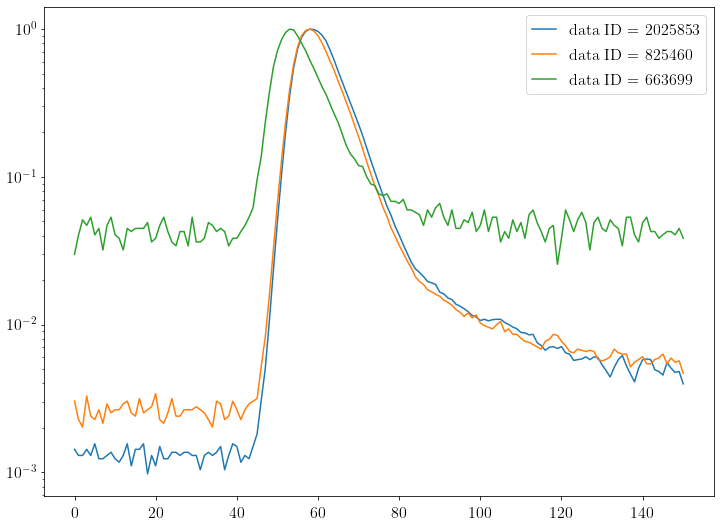

In [323]:
#fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8,15))
for ind, peak in enumerate([100, 10000, 1000000]):
#     print(ind, peak)
    peakid = psd.index[peak]
#     maxind = psd.loc[peakid]["MaxIndex"]
#     yy = psd.loc[peakid, 5:int(maxind)]
#     xx = np.arange(yy.shape[0])
#     x2 = np.arange(yy.shape[0]+4)
#     popt, pcov = optimize.leastsq(residual, p0, args=(xx, yy))
#     maxind = psd.iloc[peak]["MaxIndex"]

    plt.plot(psd.loc[peakid, 0:150]/psd.loc[peakid, "MaxVal"], label="data ID = "+str(peakid))
#     ax[ind].plot(x2, smoothstep(x2, popt[0], popt[1], popt[2], popt[3]), 
#               'r-', label="smooth step function, b= %5.3f, c=%5.3f"%(popt[1], popt[2]))
plt.legend()
plt.yscale('log')

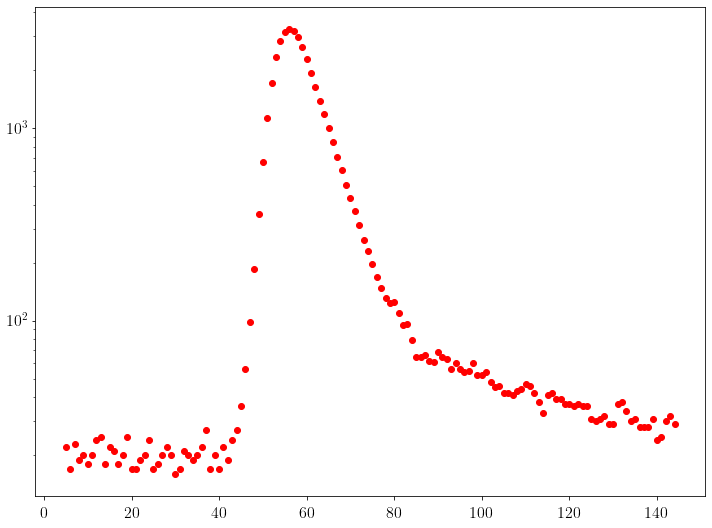

In [312]:
plt.plot(psd.iloc[128000, 10:150], 'ro')
psd.loc[2101019]
plt.yscale('log')

In [195]:
xx=psd.loc[1203302]
print(xx.MaxIndex, xx.MaxVal)
print(xx.loc[xx.MaxIndex-29:xx.MaxIndex+1].sum()/30.0, xx.loc[xx.MaxIndex:xx.MaxIndex+51].sum()/50.0)
#xx.loc[0:xx.MaxIndex+1]

56.0 6624.0
1183.2333333333333 1446.44


<AxesSubplot:>

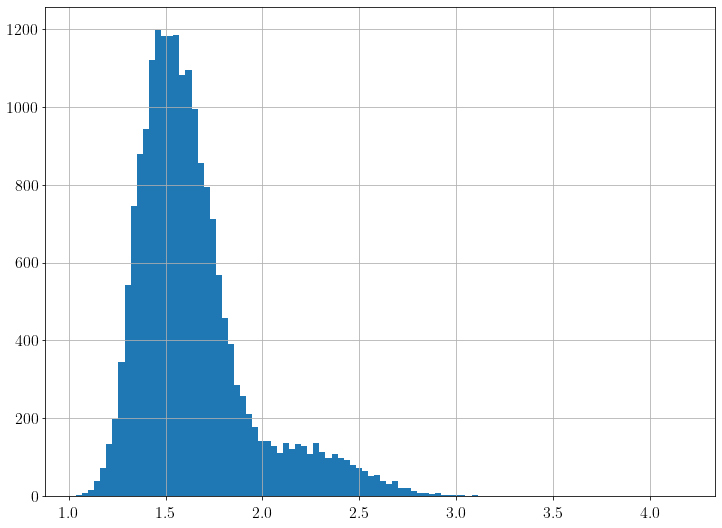

In [82]:
ppq.hist(bins=100)

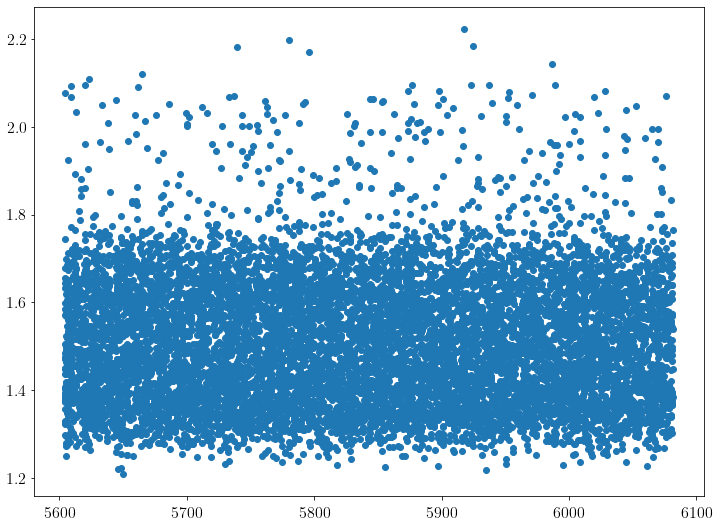

In [55]:
plt.scatter(psd.iloc[30000:40000]["MaxVal"], ppq)

59 45
1.7708520116421442 1.6532125137753437


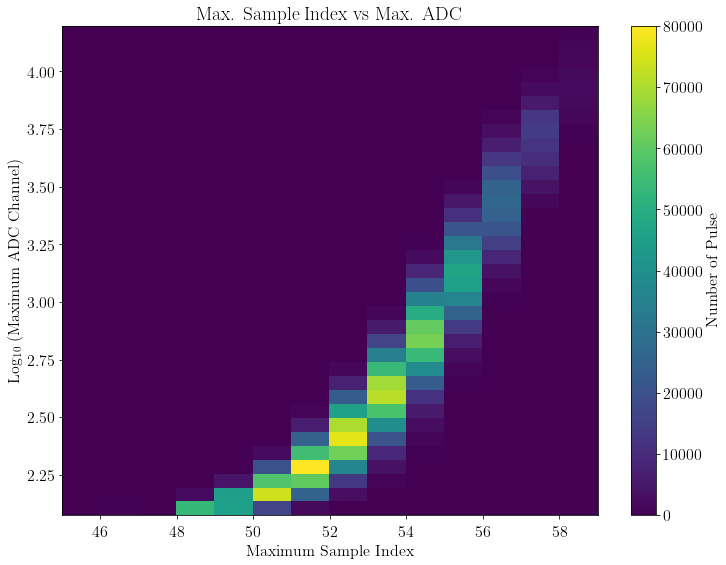

In [133]:
plt.hist2d(psd["MaxIndex"], np.log10(psd["MaxVal"]), bins=[14, 35])
plt.colorbar(label="Number of Pulse")
plt.xlabel("Maximum Sample Index")
plt.ylabel("Log${}_{10}$ (Maximum ADC Channel)")
plt.title("Max. Sample Index vs Max. ADC")
#plt.label("aa")
print(psd["MaxIndex"].max(), psd["MaxIndex"].min())
print((np.log10(psd["MaxIndex"])).max(), (np.log10(psd["MaxIndex"])).min())
#plt.xlim(44.5, 59.5)
plt.savefig("maxsample_adc_1.jpg")

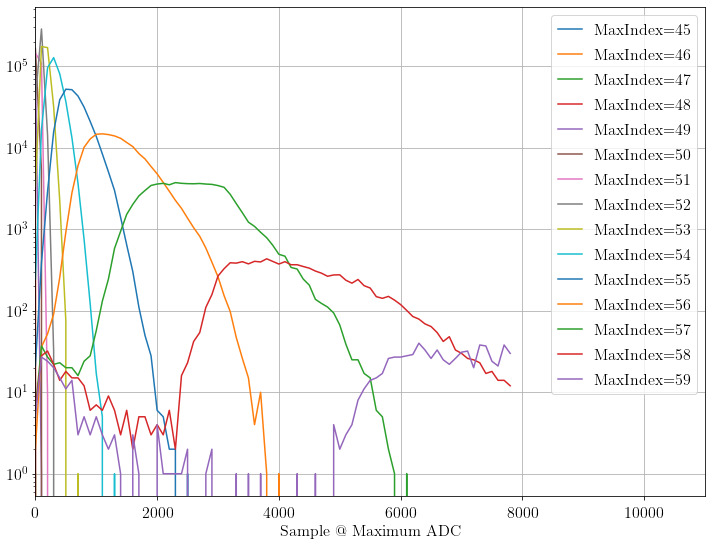

In [306]:
bb = np.arange(0, (psd.MaxVal).max()+200, 200)
bx = 0.5*(bb[:1]+bb[:-1])
rr = []
rq = []
for ind in range(45, 60):
    maxdd=psd[psd.MaxIndex==ind]
    hist=np.histogram(maxdd.MaxVal, bins=bb)
    rr.append([ind, hist[0]])
    rq.append([ind, maxdd.MaxVal.mean(), maxdd.MaxVal.std()])
for ri in rr:
    plt.plot(bx, ri[1], label="MaxIndex="+str(ri[0]))
plt.yscale('log')
plt.xlabel("Sample @ Maximum ADC ")
#plt.ylabel("Maximu ADC Value")
plt.xlim(0, 11000)
plt.legend()
plt.grid()

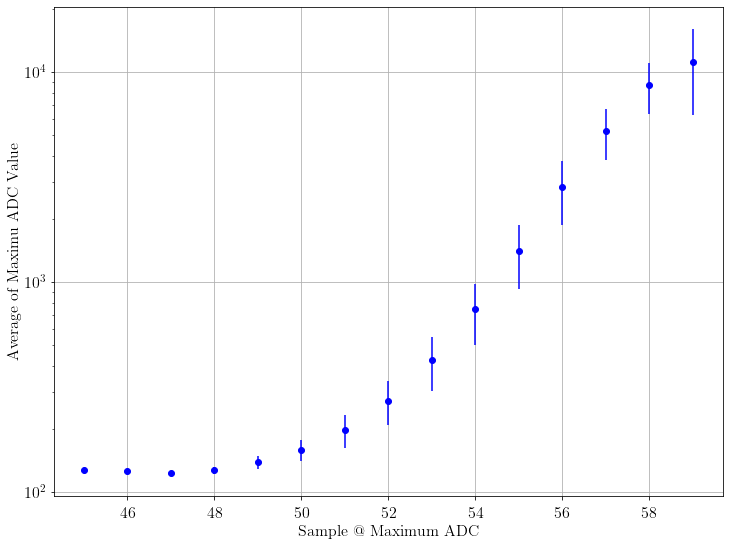

In [172]:
rrq=np.array(rq)
plt.errorbar(rrq[:, 0], rrq[:, 1], rrq[:,2], fmt='bo')
plt.yscale('log')
plt.xlabel("Sample @ Maximum ADC ")
plt.ylabel("Average of Maximu ADC Value")
plt.grid()

In [157]:
pp

[[45, 0.16455696202531644, 1.4533277374969868],
 [46, 4.746835443037975, 41.9229155047208],
 [47, 0.012658227848101266, 0.11179444134592213],
 [48, 703.1012658227849, 6209.6222445592475],
 [49, 1188.26582278481, 10494.36636535769],
 [50, 2155.8607594936707, 18456.469659636106],
 [51, 3226.1012658227846, 20216.22300961669],
 [52, 4310.696202531645, 32344.42353883596],
 [53, 4832.430379746836, 27188.408805672927],
 [54, 4763.316455696203, 20158.98645642902],
 [55, 3674.9113924050635, 11077.116036030908],
 [56, 2128.7974683544303, 4247.927907025346],
 [57, 903.1518987341772, 1347.8420266579872],
 [58, 133.67088607594937, 145.2927835436013],
 [59, 10.810126582278482, 12.665187959913043]]

In [269]:
psd2

,TimeTag,Background,Maxval,MaxIndex,0,1,2,3,4,5,...,158,159,160,161,162,163,164,165,166,167
230142,185895841418655,21.60,11999,58,23,24,23,17,28,22,...,52,60,65,69,68,67,69,67,65,61
779910,629619091027108,22.65,11997,58,25,24,23,21,24,20,...,60,60,58,57,53,52,53,55,51,59
518689,418343236091748,19.85,11997,58,23,21,21,21,22,24,...,51,50,49,45,50,57,54,49,46,43
415111,334224805304529,20.90,11996,58,22,28,17,15,18,24,...,64,61,59,61,57,52,48,53,57,45
2090671,1687018392158936,22.10,11995,58,21,22,24,25,22,17,...,55,55,56,51,57,60,55,63,57,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736831,594459843867874,16.60,119,48,16,15,11,17,20,19,...,21,15,19,22,14,21,22,20,15,16
481238,387713179527873,17.55,119,48,19,18,21,12,17,19,...,23,20,20,19,23,26,5,18,22,19
649223,523462374573999,18.05,119,48,19,17,19,20,17,16,...,16,20,15,17,18,20,18,17,18,22
815433,658098931309748,18.60,119,48,16,20,19,20,18,12,...,20,19,24,21,14,17,22,12,20,21


(0.0, 5.0)

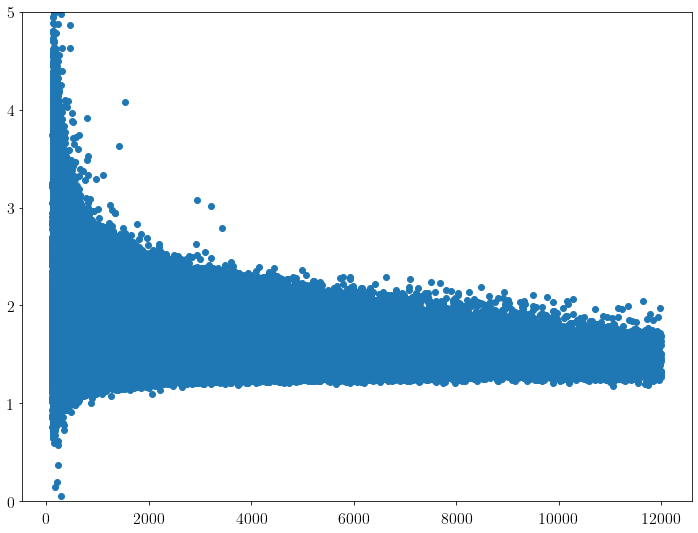

In [265]:
plt.scatter(psd2["Maxval"], ppq)
plt.ylim([0, 5])

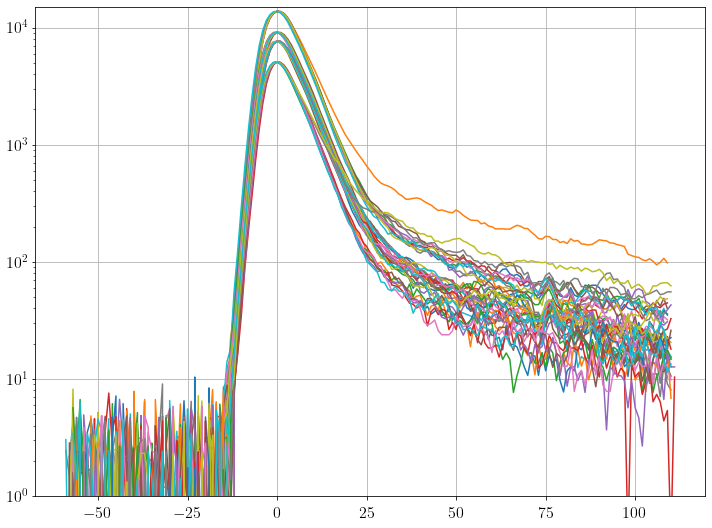

In [9]:
for i in range(521, 531):
    plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

for i in range(5521, 5531):
    plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

        
for i in range(11521, 11531):
    plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

for i in range(51521, 51531):
    plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

    
# for i in range(101521, 101531):
#     plt.plot(psd.iloc[i, 4:]-psd.iloc[i,1], label=psd.index[i])

# for i in range(301521, 301531):
#     plt.plot(psd.iloc[i, 4:]-psd.iloc[i,1], label=psd.index[i])
# for i in range(601521, 601531):
#     plt.plot(psd.iloc[i, 4:]-psd.iloc[i,1], label=psd.index[i])

# for i in range(1001621, 1001631):
#     plt.plot(psd.iloc[i, 5:]-psd.iloc[i,1], label=psd.index[i])

# for i in range(1501521, 1501531):
#     plt.plot(psd.iloc[i, 4:]-psd.iloc[i,1], label=psd.index[i])

# for i in range(2001521, 2001531):
#     plt.plot(np.arange(168)-psd.iloc[i, 3], psd.iloc[i, 4:]-psd.iloc[i,1], label=psd.index[i])

#plt.plot(psd.iloc[-1000, 4:], lw=5, label="MAx")
plt.yscale("log")
plt.ylim([1, 15000])
#plt.legend()
plt.grid()
#plt.xlim([50, 70])

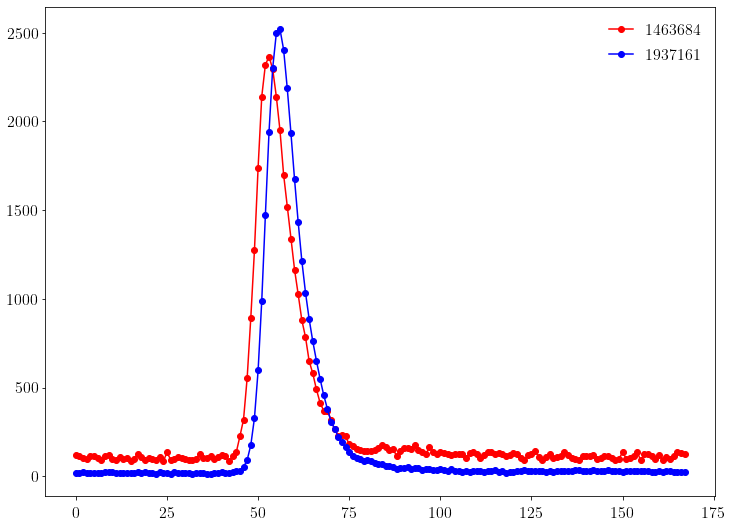

In [301]:
#plt.plot(psd.loc[628187, 3:], label=psd.iloc[628187, 0])
plt.plot(psd.loc[1173021][4:]*5, 'ro-', label=psd.index[173021] )
plt.plot(psd.loc[505592][4:], 'bo-', label=psd.index[505591] )
plt.legend()

In [234]:
psd2.

230142     58
779910     58
518689     58
415111     58
2090671    58
           ..
736831     48
481238     48
649223     48
815433     48
457420     48
Name: MaxIndex, Length: 2213413, dtype: int64

In [45]:
psd.index[218]

1028194

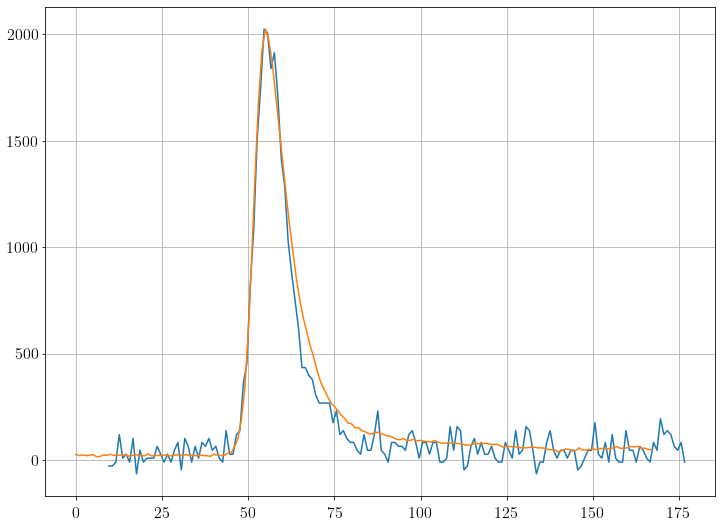

In [94]:
plt.plot(np.arange(168)+9.6, psd.iloc[107629, :][1:]*18.5-380)
plt.grid()
plt.plot(np.arange(168),psd.iloc[103365, 1:])

In [115]:
from scipy.interpolate import interp1d


In [102]:
x0=psd.loc[107629, :][1:].index
xx = x0[maxindex[107629]-2:maxindex[107629]+3]

In [112]:
yy = psd.loc[107629][xx]

In [121]:
fq = interp1d(np.array(xx, dtype=np.int),np.array(yy),kind = 'quadratic')

In [124]:
fq(np.array(xx, dtype=np.int))

array([209., 232., 241., 229., 209.])

In [220]:
from scipy.interpolate import lagrange

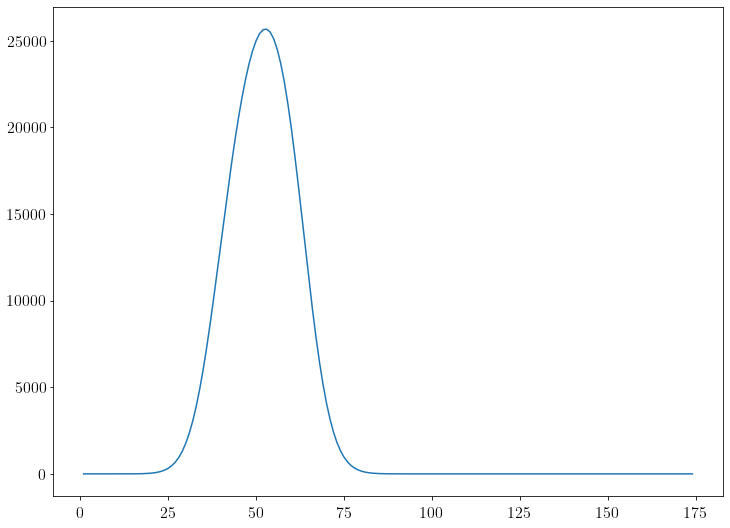

In [219]:
xx=np.arange(1, 175.0)
yy = assym1(xx, 1000.0, 12.0, 50.0)
plt.plot(xx, yy)

In [88]:
matplotlib.rc('savefig.transparent', True)

TypeError: rc() takes 1 positional argument but 2 were given

In [92]:
matplotlib.rcParams['savefig.transparent']=False